In [3]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import brokenaxes

In [4]:
# copying data file path 
file_path = "/Users/aryellewright/Documents/Documents - Aryelle’s MacBook Air/Kumar-Biomaterials-Lab/PicoGreen_Plots/20240112_PicoGreen_RAM.xlsx" 
sheet_name = "Sheet2"  

# reading and saving data from specific excel sheet
df = pd.read_excel(file_path, sheet_name=sheet_name)

In [5]:
# saving variables from excel sheet for plotting
polyplex = df['Polyplex']
avg = df['Avg. %']
stdev = df['Final std']

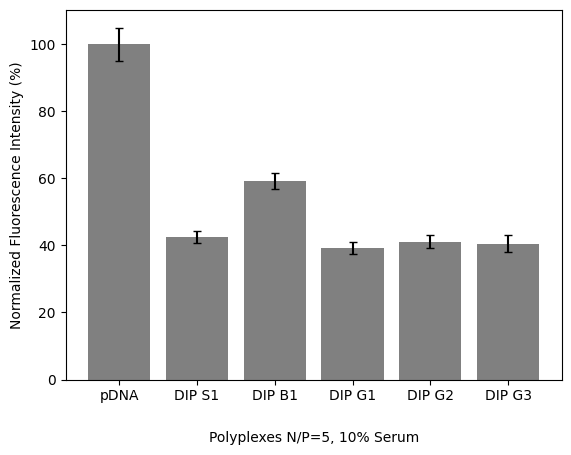

In [6]:
num_polymer = polyplex.nunique()
colors = sns.color_palette("colorblind", num_polymer)

#bax = brokenaxes.brokenaxes(ylims=((0, 8), (98, 102)),  hspace=0.1)
plt.bar(polyplex, avg, yerr=stdev, capsize = 3, color='gray')

plt.xlabel('Polyplexes N/P=5, 10% Serum', labelpad=20)
plt.ylabel('Normalized Fluorescence Intensity (%)')
plt.show()

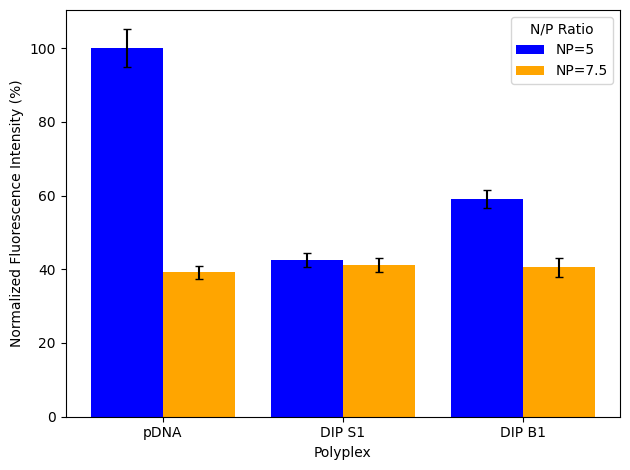

In [7]:
df['NP Ratio'] = ['NP=5' if i < len(df)/2 else 'NP=7.5' for i in range(len(df))]

# Separating the data based on N/P ratio
df_np5 = df[df['NP Ratio'] == 'NP=5'].reset_index(drop=True)
df_np75 = df[df['NP Ratio'] == 'NP=7.5'].reset_index(drop=True)

# Plotting the bars for NP=5 ratio
bars_np5 = plt.bar(df_np5.index - 0.2, df_np5['Avg. %'], 0.4, label='NP=5', color='blue')

# Plotting the bars for NP=7.5 ratio
bars_np75 = plt.bar(df_np75.index + 0.2, df_np75['Avg. %'], 0.4, label='NP=7.5', color='orange')

# Adding error bars for NP=5 ratio
for bar, std in zip(bars_np5, df_np5['Final std']):
    plt.errorbar(bar.get_x() + bar.get_width() / 2, bar.get_height(), yerr=std, color='black', capsize=3, fmt='none')

# Adding error bars for NP=7.5 ratio
for bar, std in zip(bars_np75, df_np75['Final std']):
    plt.errorbar(bar.get_x() + bar.get_width() / 2, bar.get_height(), yerr=std, color='black', capsize=3, fmt='none')

# Setting the position of the ticks and their labels
plt.xticks(range(len(df_np5)), df_np5['Polyplex'])

plt.xlabel('Polyplex')
plt.ylabel('Normalized Fluorescence Intensity (%)')
plt.legend(title='N/P Ratio')

plt.tight_layout()
plt.show()